# Setting up the metagenomic-SIP experiment

Samuel Barnett

### Introduction

Using the selected genomes from Selecting_genomes.ipynb, I will set up the SIP experiment. This will intail:

    1. Generating community table with genome abundances
    2. Generating incorporation table
    3. Generating gradient fractions

In this simulation, each library is defined by a different microcosm treated with a different 13C labeled substrate. As with a standard multi-substrate SIP study, only the substrate label is different so the overall community structure should be similar between microcosms. However, the incorporators will potentially be different between substrates.

This proceedure requires SIPSim (https://github.com/nick-youngblut/SIPSim)

## 1) Initialization

First I need to import the python modules I'll use, set some variables, initiate R magic, and create/get into the working directory.

In [1]:
import os
workDir = '/home/sam/data/SIPSim2_data/RealWorld_study3/'
nprocs = 10

In [2]:
import sys
import pandas as pd
import numpy as np
import ConfigParser


In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(dplyr)
library(ggplot2)

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [5]:
# making directories
## working directory
if not os.path.isdir(workDir):
    os.makedirs(workDir)
%cd $workDir


/home/sam/data/SIPSim2_data/RealWorld_study3


In [6]:
sam40 = pd.read_table("low_GC_skew_genomes.txt")
sam40['genome_name'] = sam40[['species', 'accession',]].apply(lambda x: '_'.join(x), axis=1)
sam50 = pd.read_table("medium_GC_genomes.txt")
sam50['genome_name'] = sam50[['species', 'accession',]].apply(lambda x: '_'.join(x), axis=1)
sam60 = pd.read_table("high_GC_skew_genomes.txt")
sam60['genome_name'] = sam60[['species', 'accession',]].apply(lambda x: '_'.join(x), axis=1)

sam40.head()

,taxon_name,accession,species,genome_length,GC_percent,num_chromosomes,file_name,genome_name
0,GCF_000325665.1_ASM32566v1_genomic,NC_019908.1,Brachyspira_pilosicoli,2555556,27.917330,1,GCF_000325665.1_ASM32566v1_genomic.fna,Brachyspira_pilosicoli_NC_019908.1
1,GCF_001685395.1_ASM168539v1_genomic,NZ_CP014167.1,Paenibacillus_yonginensis,4985901,51.014430,1,GCF_001685395.1_ASM168539v1_genomic.fna,Paenibacillus_yonginensis_NZ_CP014167.1
2,GCF_001262055.1_ASM126205v1_genomic,NZ_CP012072.1,Actinomyces_meyeri,2049088,65.509973,1,GCF_001262055.1_ASM126205v1_genomic.fna,Actinomyces_meyeri_NZ_CP012072.1
3,GCF_900169485.1_PRJEB19959_genomic,NZ_LT821227.1,Eggerthellaceae_bacterium,1447956,43.440616,1,GCF_900169485.1_PRJEB19959_genomic.fna,Eggerthellaceae_bacterium_NZ_LT821227.1
4,GCF_000953475.1_MfumSolVChr1_genomic,NZ_LM997411.1,Methylacidiphilum_fumariolicum,2476671,41.476603,1,GCF_000953475.1_MfumSolVChr1_genomic.fna,Methylacidiphilum_fumariolicum_NZ_LM997411.1


## 2) Genome index
I need indexing files connecting genome names to their file_name

In [7]:
sam40_index = sam40.copy()[['genome_name', 'file_name']]
sam40_index.to_csv('low_GC_skew_genome_index.txt', sep='\t', header=False, index=False)
sam50_index = sam50.copy()[['genome_name', 'file_name']]
sam50_index.to_csv('medium_GC_genome_index.txt', sep='\t', header=False, index=False)
sam60_index = sam60.copy()[['genome_name', 'file_name']]
sam60_index.to_csv('high_GC_skew_genome_index.txt', sep='\t', header=False, index=False)

!head low_GC_skew_genome_index.txt
!head medium_GC_genome_index.txt
!head high_GC_skew_genome_index.txt

Brachyspira_pilosicoli_NC_019908.1	GCF_000325665.1_ASM32566v1_genomic.fna
Paenibacillus_yonginensis_NZ_CP014167.1	GCF_001685395.1_ASM168539v1_genomic.fna
Actinomyces_meyeri_NZ_CP012072.1	GCF_001262055.1_ASM126205v1_genomic.fna
Eggerthellaceae_bacterium_NZ_LT821227.1	GCF_900169485.1_PRJEB19959_genomic.fna
Methylacidiphilum_fumariolicum_NZ_LM997411.1	GCF_000953475.1_MfumSolVChr1_genomic.fna
Beggiatoa_leptomitoformis_NZ_CP012373.1	GCF_001305575.2_ASM130557v2_genomic.fna
complete_chromosome_NC_022549.1	GCF_000967915.1_ASM96791v1_genomic.fna
Mycoplasma_suis_NC_015155.1	GCF_000179035.2_ASM17903v2_genomic.fna
Campylobacter_lari_NC_012039.1	GCF_000019205.1_ASM1920v1_genomic.fna
Bacillus_krulwichiae_NZ_CP020814.1	GCF_002109385.1_ASM210938v1_genomic.fna
Thermoanaerobacter_tengcongensis_NC_003869.1	GCF_000007085.1_ASM708v1_genomic.fna
Sulfurospirillum_deleyianum_NC_013512.1	GCF_000024885.1_ASM2488v1_genomic.fna
Marinitoga_piezophila_NC_016751.1	GCF_000255135.1_ASM25513v1_genomic.fna
Desulfotomacu

## 3) Community table

I need a table giving me the abundance of each species in each library. Each library is basically a different microcosm. All libraries should be very similar in abundance as I'm simulating an experiment where each microcosm is treated the same so any variations in community are just due to chance alone. I'll target all microcosms to be within a Bray-Curtis dissimilarity of 0.2. This proceedure requires SIPSim (https://github.com/nick-youngblut/SIPSim)

In [8]:
%%bash

SIPSim communities \
    --n_comm 6 \
    --richness 1 \
    --abund_dist lognormal \
    --abund_dist_p mean:2,sigma:0.8 \
    --shared_perc 100 \
    --perm_perc 10 \
    low_GC_skew_genome_index.txt > low_GC_skew_comm.txt
    
SIPSim communities \
    --n_comm 6 \
    --richness 1 \
    --abund_dist lognormal \
    --abund_dist_p mean:2,sigma:0.8 \
    --shared_perc 100 \
    --perm_perc 10 \
    medium_GC_genome_index.txt > medium_GC_comm.txt
    
SIPSim communities \
    --n_comm 6 \
    --richness 1 \
    --abund_dist lognormal \
    --abund_dist_p mean:2,sigma:0.8 \
    --shared_perc 100 \
    --perm_perc 10 \
    high_GC_skew_genome_index.txt > high_GC_skew_comm.txt
    
head low_GC_skew_comm.txt
tail low_GC_skew_comm.txt

library	taxon_name	rel_abund_perc	rank
1	Terriglobus_roseus_NC_018014.1	1.558293121	1
1	Candidatus_Nitrospira_NC_014355.1	1.161031390	2
1	Spiroplasma_kunkelii_NZ_CP010899.1	1.146857039	3
1	Spiroplasma_litorale_NZ_CP012357.1	1.121642916	4
1	Thermus_scotoductus_NC_014974.1	1.014649272	5
1	Bartonella_grahamii_NC_012846.1	0.853914219	6
1	Cellvibrio_japonicus_NC_010995.1	0.847572901	7
1	Saccharomonospora_viridis_NC_013159.1	0.813105100	8
1	Chryseobacterium_indologenes_NZ_CP018786.1	0.762417548	9
6	Leuconostoc_citreum_NC_010471.1	0.031966337	491
6	Streptococcus_himalayensis_NZ_CP016953.1	0.027543523	492
6	Flavobacterium_columnare_NC_016510.2	0.025933557	493
6	Spiroplasma_turonicum_NZ_CP012328.1	0.025320589	494
6	Photobacterium_gaetbulicola_NZ_CP005973.1	0.025235889	495
6	Clostridium_stercorarium_NC_020134.1	0.022591101	496
6	Laribacter_hongkongensis_NC_012559.1	0.022071548	497
6	Bacillus_beveridgei_NZ_CP012502.1	0.017577754	498
6	Rothia_mucilaginosa_NC_013715.1	0.015566209	499
6	Melioribacte

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2


Take a look a the Bray-Curtis dissimilarities between samples.

In [17]:
%%R
sam40.comm.df = read.table("low_GC_skew_comm.txt", sep="\t", header=TRUE)
sam40.comm.mat = sam40.comm.df %>%
    select(-rank) %>%
    mutate(library = paste("library", library, sep="_")) %>%
    tidyr::spread(key=taxon_name, value=rel_abund_perc) %>%
    tibble::column_to_rownames(var="library")

sam40.comm.dist = vegan::vegdist(sam40.comm.mat, method="bray")
print(sam40.comm.dist)

sam50.comm.df = read.table("medium_GC_comm.txt", sep="\t", header=TRUE)
sam50.comm.mat = sam50.comm.df %>%
    select(-rank) %>%
    mutate(library = paste("library", library, sep="_")) %>%
    tidyr::spread(key=taxon_name, value=rel_abund_perc) %>%
    tibble::column_to_rownames(var="library")

sam50.comm.dist = vegan::vegdist(sam50.comm.mat, method="bray")
print(sam50.comm.dist)

sam60.comm.df = read.table("high_GC_skew_comm.txt", sep="\t", header=TRUE)
sam60.comm.mat = sam60.comm.df %>%
    select(-rank) %>%
    mutate(library = paste("library", library, sep="_")) %>%
    tidyr::spread(key=taxon_name, value=rel_abund_perc) %>%
    tibble::column_to_rownames(var="library")

sam60.comm.dist = vegan::vegdist(sam60.comm.mat, method="bray")
print(sam60.comm.dist)

           library_1  library_2  library_3  library_4  library_5
library_2 0.10996318                                            
library_3 0.10040343 0.12101592                                 
library_4 0.11148232 0.11119766 0.10696636                      
library_5 0.10754955 0.10557245 0.11311535 0.09059324           
library_6 0.09475523 0.10878981 0.09673532 0.09000198 0.09750397
          library_1 library_2 library_3 library_4 library_5
library_2 0.1141435                                        
library_3 0.1140770 0.1297139                              
library_4 0.1263337 0.1449174 0.1253408                    
library_5 0.1250772 0.1442443 0.1248731 0.1237112          
library_6 0.1045700 0.1183392 0.1101418 0.1111000 0.1140917
           library_1  library_2  library_3  library_4  library_5
library_2 0.09305096                                            
library_3 0.09089277 0.09355766                                 
library_4 0.08778973 0.08702308 0.08388270             

Then take a look at the rank abundance plot

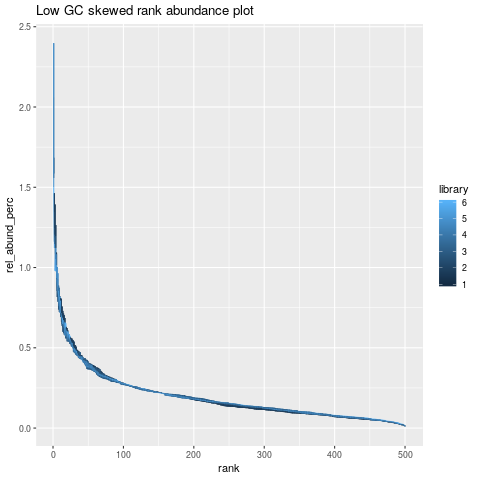

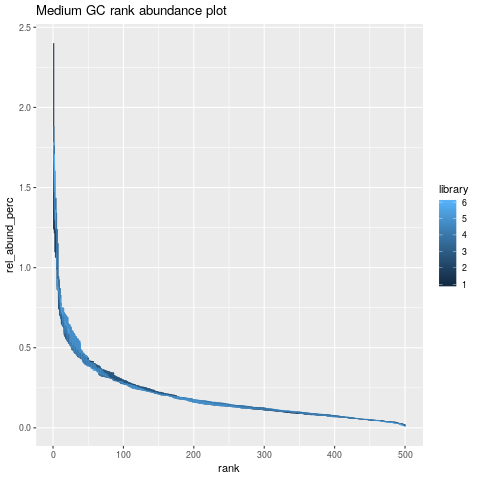

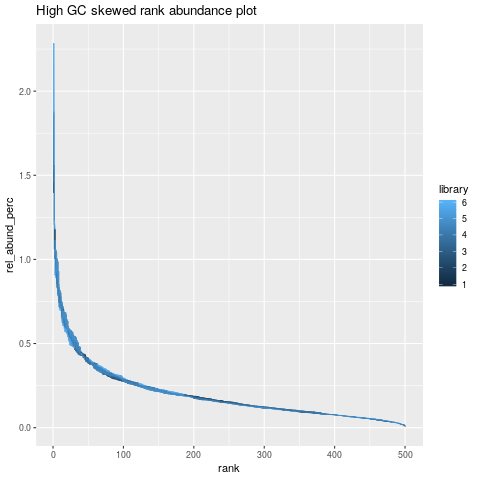

In [18]:
%%R

sam40.comm.plot = ggplot(data=sam40.comm.df, aes(x=rank, y=rel_abund_perc, color=library)) +
    geom_line() +
    ggtitle(label = "Low GC skewed rank abundance plot")
print(sam40.comm.plot)

sam50.comm.plot = ggplot(data=sam50.comm.df, aes(x=rank, y=rel_abund_perc, color=library)) +
    geom_line() +
    ggtitle(label = "Medium GC rank abundance plot")
print(sam50.comm.plot)

sam60.comm.plot = ggplot(data=sam60.comm.df, aes(x=rank, y=rel_abund_perc, color=library)) +
    geom_line() +
    ggtitle(label = "High GC skewed rank abundance plot")
print(sam60.comm.plot)

## 3) Set incorporation parameters

All genomes will be set an incorporation of 90% with standard deviation of 5%. I will run an analysis with 5 different incorporator groups (separate libraries). This is essentially using 5 different carbon substrates, each of which are potentially utilized by a different set of microbes. For all 5 groups, 50 genomes (10% of the community) will be incorporators. In total the number of incorporator genomes should be 100 genomes (20%). Also, while I cannot normalize for GC content, I can somewhat normalize for relative abundance of the community across genome sets. This means that I wont have a situation where in one set there is a super high abundant incporporator but not a comparable one in other samples.

In [19]:
total_incorp = 100
sample_incorp = 50

rank_list = np.random.choice(range(1, 501), size=total_incorp, replace=False)

incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
while len(list(set(incorp_df['rank']))) != 100:
    incorp_df = pd.DataFrame(columns=['rank', 'library', 'percent_incorporation', 'sd_incorporation'])
    for lib in [2,3,4,5,6]:
        sub_incorp = pd.DataFrame({'rank' : np.random.choice(rank_list, size=sample_incorp, replace=False),
                                   'library' : lib, 'percent_incorporation' : 90, 'sd_incorporation' : 5})
        incorp_df = incorp_df.append(sub_incorp)
           
for genomeset in ['low_GC_skew', 'medium_GC', 'high_GC_skew']:
    comm = pd.read_table(''.join([genomeset, '_comm.txt'])).groupby('taxon_name', as_index=False).agg({'rel_abund_perc': 'mean'})
    comm['rank'] = comm['rel_abund_perc'].rank(ascending=1)
    if len(list(set(comm['rank']))) != 500:
        print "Error"
    incorp_genomes = comm[comm['rank'].isin(rank_list)]
    incorp_genomes = incorp_genomes[['rank', 'taxon_name']]
    sub_incorp_df = pd.merge(incorp_df, incorp_genomes, on='rank', how='left')
    sub_incorp_df = sub_incorp_df[['taxon_name', 'library', 'percent_incorporation', 'sd_incorporation']]
    sub_incorp_df.to_csv('_'.join([genomeset, 'incorporators.txt']), sep='\t', header=True, index=False)



In [20]:
!head low_GC_skew_incorporators.txt
!head medium_GC_incorporators.txt
!head high_GC_skew_incorporators.txt


taxon_name	library	percent_incorporation	sd_incorporation
Blattabacterium_sp._NC_016621.1	2	90	5
Staphylococcus_lugdunensis_NC_013893.1	2	90	5
Secondary_endosymbiont_NC_018420.1	2	90	5
Gluconacetobacter_diazotrophicus_NC_011365.1	2	90	5
Idiomarina_piscisalsi_NZ_CP022133.1	2	90	5
Methylomicrobium_alcaliphilum_NC_016112.1	2	90	5
Melioribacter_roseus_NC_018178.1	2	90	5
Acetobacter_pasteurianus_NZ_CP015164.1	2	90	5
Ilyobacter_polytropus_NC_014632.1	2	90	5
taxon_name	library	percent_incorporation	sd_incorporation
Pelobacter_propionicus_NC_008609.1	2	90	5
Pseudarthrobacter_sulfonivorans_NZ_CP013747.1	2	90	5
Methylotenera_mobilis_NC_012968.1	2	90	5
Corynebacterium_halotolerans_NC_020302.1	2	90	5
Streptomyces_avermitilis_NC_003155.5	2	90	5
Desulfurivibrio_alkaliphilus_NC_014216.1	2	90	5
Pedobacter_heparinus_NC_013061.1	2	90	5
Comamonas_serinivorans_NZ_CP021455.1	2	90	5
Lactobacillus_hokkaidonensis_NZ_AP014680.1	2	90	5
taxon_name	library	percent_incorporation	sd_incorporation
Streptomyces_punic

Now I'll make sure that one reference set isn't weighted too heavily with high or low G+C incorporators.

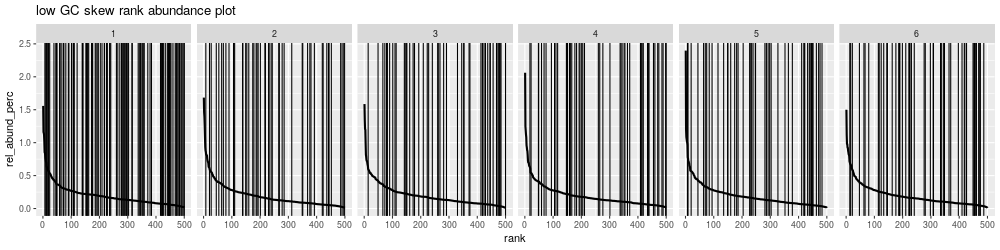

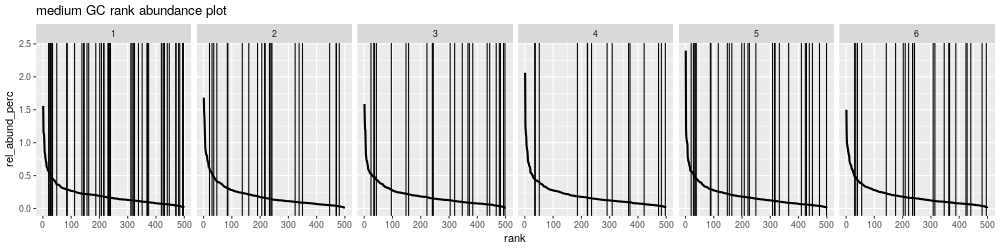

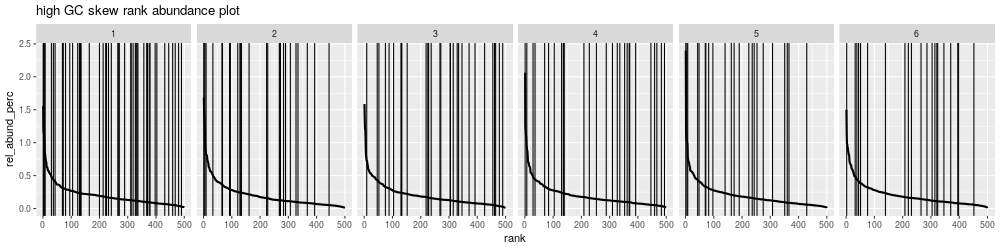

In [21]:
%%R -w 1000 -h 250

for (genomeset in c('low_GC_skew', 'medium_GC', 'high_GC_skew')){
    incorp.df = read.table(paste(genomeset, "_incorporators.txt", sep=""), sep="\t", header=TRUE)
    incorps = unique(incorp.df$taxon_name)
    comm.df = read.table("low_GC_skew_comm.txt", sep="\t", header=TRUE) %>%
        mutate(incorp = ifelse(library == 1 & taxon_name %in% incorps, "Yes", "No")) %>%
        left_join(incorp.df, by=c("taxon_name", "library")) %>%
        mutate(percent_incorporation = ifelse(is.na(percent_incorporation), 0, percent_incorporation))


    comm.plot = ggplot(data=comm.df, aes(x=rank, y=rel_abund_perc)) +
        geom_line(size=1) +
        geom_vline(data=comm.df[comm.df$library == 1 & comm.df$incorp == "Yes",], aes(xintercept = rank)) +
        geom_vline(data=comm.df[comm.df$percent_incorporation != 0,], aes(xintercept = rank)) +
        ggtitle(label = paste(gsub("_", " ", genomeset), "rank abundance plot")) +
        facet_wrap(~library, nrow=1)
    print(comm.plot)
}


## 4) Generate fractions

Generate the fractions to use for each of the simulations. I'll use the same fractions for all three reference genome sets. This proceedure requires SIPSim (https://github.com/nick-youngblut/SIPSim).

In [22]:
%%bash
SIPSim gradient_fractions \
    --BD_min 1.675142 \
    --BD_max 1.771023 \
    low_GC_skew_comm.txt > fractions.txt
    
head fractions.txt

library	fraction	BD_min	BD_max	fraction_size
1	1	1.675	1.676	0.001
1	2	1.676	1.679	0.003
1	3	1.679	1.681	0.002
1	4	1.681	1.684	0.003
1	5	1.684	1.688	0.004
1	6	1.688	1.693	0.005
1	7	1.693	1.697	0.004
1	8	1.697	1.699	0.002
1	9	1.699	1.702	0.003


DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
